# Microseismic data

In [1]:
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

from obspy import read
import numpy as np
import matplotlib.pyplot as plt


In [2]:
datahome = '/Users/glyjw/Data/HornRiver/S_Well/'
st = read(datahome + '20130806.040535.S_Well.015.?')

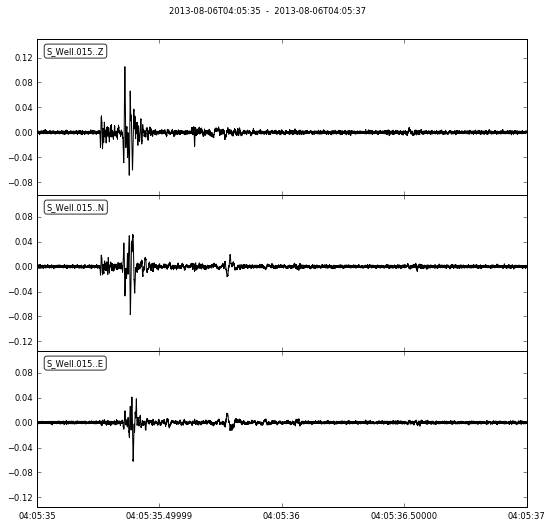

In [3]:
st.plot()

In [4]:
st[0].stats.sac['t1']

0.35075003

In [5]:
delta = st[0].stats.delta
t = sw.Trio(st[1].data,st[2].data,st[0].data,delta=delta)

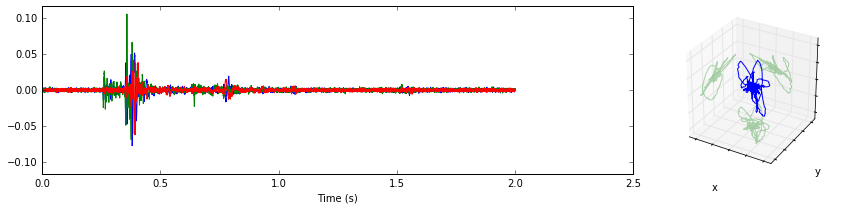

In [6]:
t.plot()

In [7]:
s = st.copy()
stime = s[0].stats.starttime + s[0].stats.sac['t1']
s.trim(stime-0.1,stime+0.1)

3 Trace(s) in Stream:
S_Well.015..E | 2013-08-06T04:05:35.250750Z - 2013-08-06T04:05:35.450750Z | 4000.0 Hz, 801 samples
S_Well.015..N | 2013-08-06T04:05:35.250750Z - 2013-08-06T04:05:35.450750Z | 4000.0 Hz, 801 samples
S_Well.015..Z | 2013-08-06T04:05:35.250750Z - 2013-08-06T04:05:35.450750Z | 4000.0 Hz, 801 samples

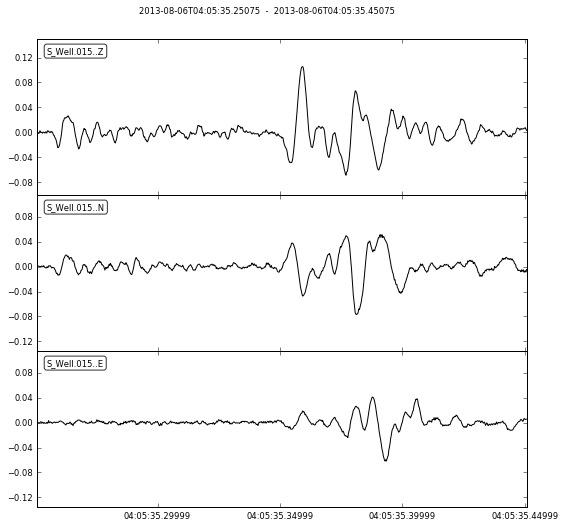

In [8]:
s.plot()
t = sw.Trio(s[1].data,s[2].data,s[0].data)
w = sw.Window(101,20)

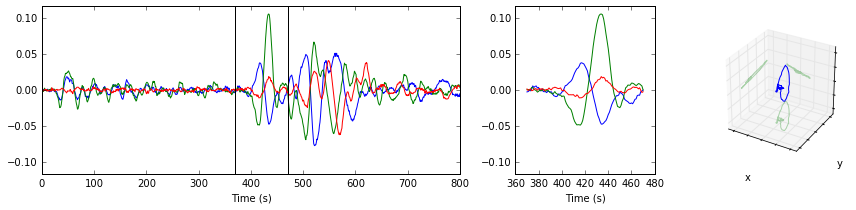

In [9]:
t.plot(window=w)

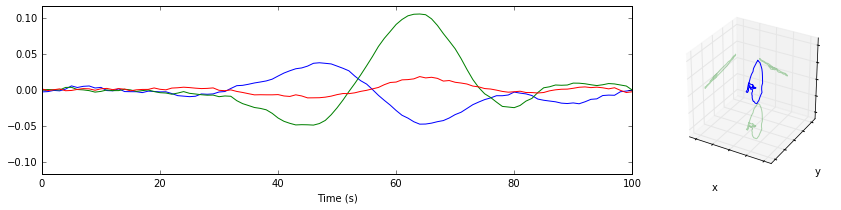

In [10]:
tchop = t.copy()
tchop.chop(w)
tchop.plot()

In [34]:
cov = np.cov(np.vstack((tchop.x,tchop.y,tchop.z)))
eigval, eigvec = np.linalg.eig(cov)
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:,idx]

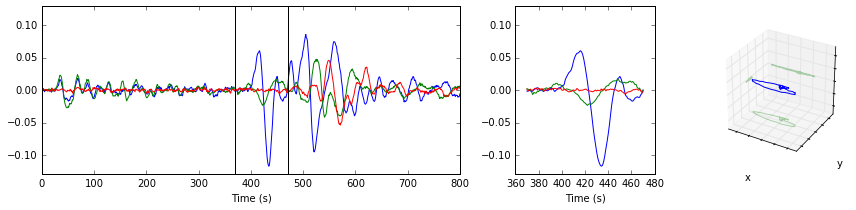

In [43]:
# rotate data into eigenvector system.
trot = t.copy()
trot.x,trot.y,trot.z = np.dot(eigvec.T,trot.xyz())
trot.plot(window=w)


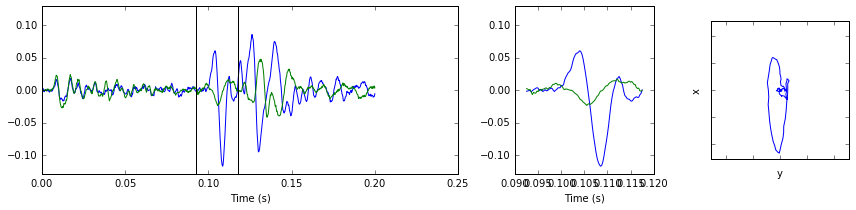

In [44]:
p = sw.Pair(trot.x,trot.y,delta=delta,window=w)
p.plot(window=w)

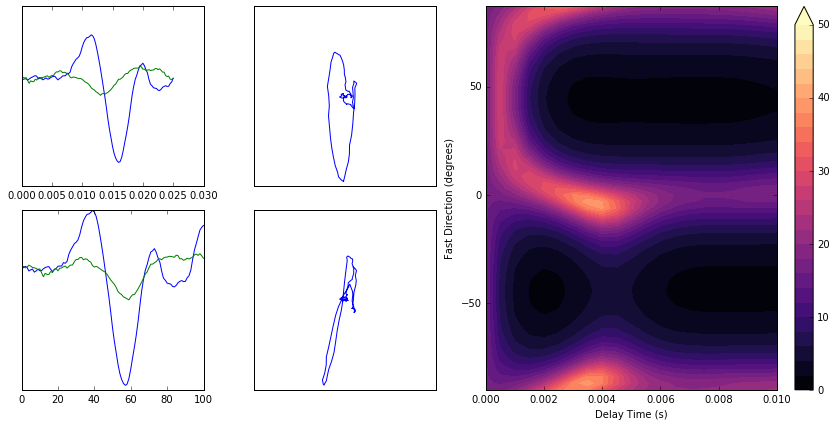

In [49]:
m = sw.EigenM(p,window=w,tlags=np.linspace(0,0.01,41))
m.plot()

In [50]:
bs = sw.eigval.Bootstrap(p,window=w,tlags=np.linspace(0,0.01,41))

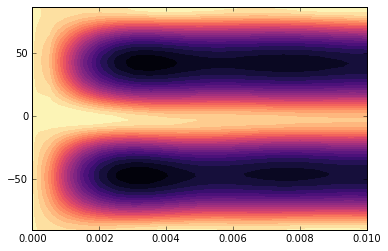

In [53]:
# np.average(bs.stk_l1_l2,axis=0)

plt.contourf(m.tlags,m.degs,np.average(bs.stk_l1_l2,axis=0),26,cmap='magma')


In [59]:
w2 = sw.Window(121,130)
# t.plot(window=w2)
tchop = t.copy()
tchop.chop(w2)
cov = np.cov(np.vstack((tchop.x,tchop.y,tchop.z)))
eigval, eigvec = np.linalg.eig(cov)
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:,idx]

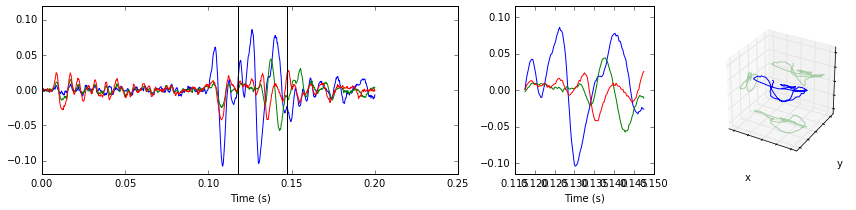

In [60]:
# rotate data into eigenvector system.
trot = t.copy()
trot.x,trot.y,trot.z = np.dot(eigvec.T,trot.xyz())
trot.plot(window=w2)

In [61]:
st[0].stats

         network: S_Well
         station: 015
        location: 
         channel: E
       starttime: 2013-08-06T04:05:35.000000Z
         endtime: 2013-08-06T04:05:37.000000Z
   sampling_rate: 3999.99975586
           delta: 0.000250000015259
            npts: 8001
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 90.0, u'dist': 0.0, u'nzyear': 2013, u'nzjday': 218, u'iztype': 9, u'evla': 6581111.5, u'knetwk': u'S_Well  ', u'o': 0.0, u'lcalda': 0, u'stdp': 1382.0, u'evlo': 552728.0, u'scale': 1.0, u'nvhdr': 6, u'depmin': -0.061828919, u'kcmpnm': u'E       ', u'nzsec': 35, u'internal0': 2.0, u'depmen': -3.84041e-06, u'cmpinc': 90.0, u'evdp': 1785.5963, u'depmax': 0.040902577, u'iftype': 1, u'mag': -1.2827491, u'delta': 0.00025000001, u'e': 2.0000002, u'nzmsec': 0, u'lpspol': 1, u'b': 0.0, u'stla': 6581411.0, u'leven': 1, u'stlo': 552724.0, u't0': 0.25575003, u't1': 0.35075003, u'kstnm': u'015     ', u'nzmin': 5, u'lovrok': 1, u'npts': 8001, u'nzhour'